# Detecção de Fraudes em Transações Bancárias

A detecção de fraudes financeiras é uma questão crítica no setor bancário, onde atividades ilícitas podem resultar em grandes perdas financeiras e danos à reputação das instituições. Este projeto se propõe a explorar dados transacionais detalhados para identificar padrões de comportamento e anomalias associados a fraudes. Utilizando técnicas de ciência de dados, análise estatística e aprendizado de máquina, o objetivo é criar modelos preditivos eficazes que possam melhorar a segurança financeira e proteger consumidores e instituições contra atividades fraudulentas.

---

### Sobre o Conjunto de Dados

O conjunto de dados utilizado fornece uma visão abrangente do comportamento transacional e dos padrões de atividade financeira. Composto por 2.512 amostras de dados, ele abrange diversos atributos que permitem uma análise detalhada para identificar possíveis fraudes e comportamentos atípicos. Cada entrada é rica em informações e reflete diferentes aspectos do ciclo de vida das transações financeiras, incluindo dados demográficos, detalhes do dispositivo e características de uso.

---

### Principais Características do Dataset

1. **TransactionID**: Identificador alfanumérico exclusivo para cada transação, garantindo rastreabilidade.
2. **AccountID**: Identificador exclusivo para cada conta, permitindo análise de múltiplas transações por cliente.
3. **TransactionAmount**: Valor monetário de cada transação, abrangendo desde despesas cotidianas até grandes compras.
4. **TransactionDate**: Data e hora em que a transação foi realizada, crucial para análise temporal.
5. **TransactionType**: Tipo da transação, classificada como 'Crédito' ou 'Débito'.
6. **Localização**: Localização geográfica da transação, indicada pelos nomes de cidades nos EUA.
7. **DeviceID**: Identificador alfanumérico para dispositivos utilizados nas transações, ajudando a identificar padrões de uso.
8. **Endereço IP**: Endereço IPv4 associado às transações, com mudanças ocasionais.
9. **MerchantID**: Identificador único de comerciantes, útil para identificar comerciantes preferenciais ou anômalos.
10. **AccountBalance**: Saldo restante na conta após a transação, com impacto direto no comportamento do cliente.
11. **PreviousTransactionDate**: Data e hora da última transação, permitindo análise de frequência de transações.
12. **Canal**: Meio pelo qual a transação foi realizada, como Online, ATM ou Agência.
13. **CustomerAge**: Idade do titular da conta, permitindo análise de comportamentos por faixas etárias.
14. **CustomerOccupation**: Ocupação do titular da conta, refletindo padrões de renda e uso financeiro.
15. **TransactionDuration**: Duração em segundos da transação, variando por tipo e complexidade.
16. **LoginAttempts**: Número de tentativas de login antes de uma transação, um possível indicador de atividades suspeitas.

---

### Objetivo do Projeto

O objetivo principal é explorar este rico conjunto de dados para identificar padrões associados a transações fraudulentas. Isso inclui:
- **Entender os dados**: Realizar uma análise exploratória para identificar padrões, correlações e possíveis anomalias.
- **Criar um modelo preditivo**: Construir um sistema de aprendizado de máquina que consiga detectar atividades fraudulentas com precisão.
- **Avaliar e mitigar riscos**: Desenvolver insights e recomendações baseados nos resultados para aumentar a segurança financeira.

Com esta abordagem, o projeto visa não apenas criar um modelo eficiente, mas também gerar insights que possam ser utilizados em aplicações reais no setor financeiro.

# Importando as Bibliotecas


In [4]:
# Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### Carregando os dados

In [6]:
df = pd.read_csv('bank_transactions_data_2.csv')

df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


### Analisando os dados

In [8]:
df.shape

(2512, 16)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [14]:
df.nunique()

TransactionID              2512
AccountID                   495
TransactionAmount          2455
TransactionDate            2512
TransactionType               2
Location                     43
DeviceID                    681
IP Address                  592
MerchantID                  100
Channel                       3
CustomerAge                  63
CustomerOccupation            4
TransactionDuration         288
LoginAttempts                 5
AccountBalance             2510
PreviousTransactionDate     360
dtype: int64

In [16]:
# verificando valores ausentes
df.isnull().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [18]:
# filtrando valores duplicatos
df.duplicated().sum()

0

### Limpeza dos dados 

In [21]:
# Converter as colunas de data para o formato datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format='%Y-%m-%d %H:%M:%S')
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'], format='%Y-%m-%d %H:%M:%S')
print(df[['TransactionDate', 'PreviousTransactionDate']].dtypes)

TransactionDate            datetime64[ns]
PreviousTransactionDate    datetime64[ns]
dtype: object


In [23]:
# removendo colunas TransactionID e AccountID (entendo que essas variáveis não tem importância).
df = df.drop(columns=['TransactionID'])
df.head(2)

,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35


# Análise Exploratória

In [26]:
df.describe()

,TransactionAmount,TransactionDate,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512.000000,2512
mean,297.593778,2023-07-05 20:32:10.826433024,44.673965,119.643312,1.124602,5114.302966,2024-11-04 08:09:22.219745024
min,0.260000,2023-01-02 16:00:06,18.000000,10.000000,1.000000,101.250000,2024-11-04 08:06:23
25%,81.885000,2023-04-03 16:22:05.750000128,27.000000,63.000000,1.000000,1504.370000,2024-11-04 08:07:53
50%,211.140000,2023-07-07 17:49:43.500000,45.000000,112.500000,1.000000,4735.510000,2024-11-04 08:09:22
75%,414.527500,2023-10-06 18:40:53.500000,59.000000,161.000000,1.000000,7678.820000,2024-11-04 08:10:53.249999872
max,1919.110000,2024-01-01 18:21:50,80.000000,300.000000,5.000000,14977.990000,2024-11-04 08:12:23
std,291.946243,NaN,17.792198,69.963757,0.602662,3900.942499,NaN


### Distribuição das transações `(TransactionAmount)`
Irei explorar se existem variações ou picos em datas específicas que podem ser indicativos de sazonalidade ou comportamentos fraudulentos.

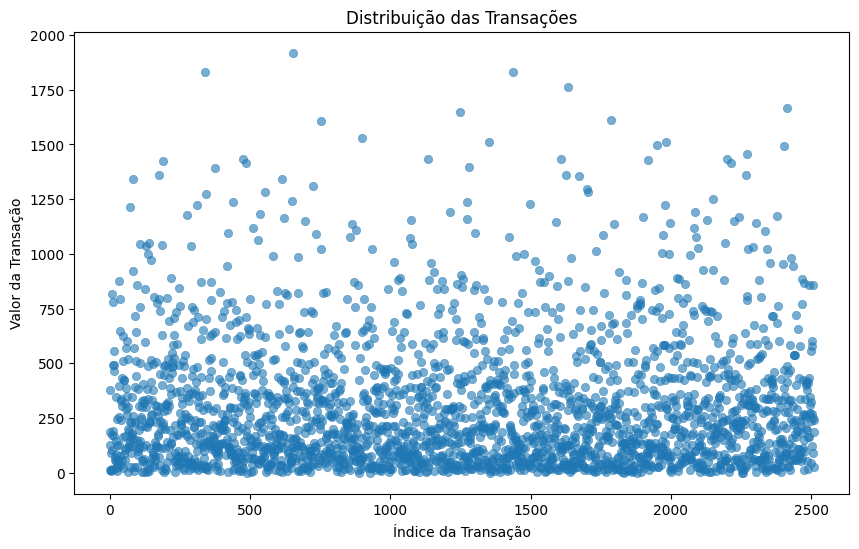

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=range(len(df['TransactionAmount'])), y=df['TransactionAmount'], alpha=0.6, edgecolor=None)
plt.title("Distribuição das Transações")
plt.xlabel("Índice da Transação")
plt.ylabel("Valor da Transação")
plt.show()

### Transações ao longo do tempo `(volume por dia)`, `(Transações ao longo do tempo)`
Identificar picos e sazonalidades e detectar anormalidades em períodos específicos.

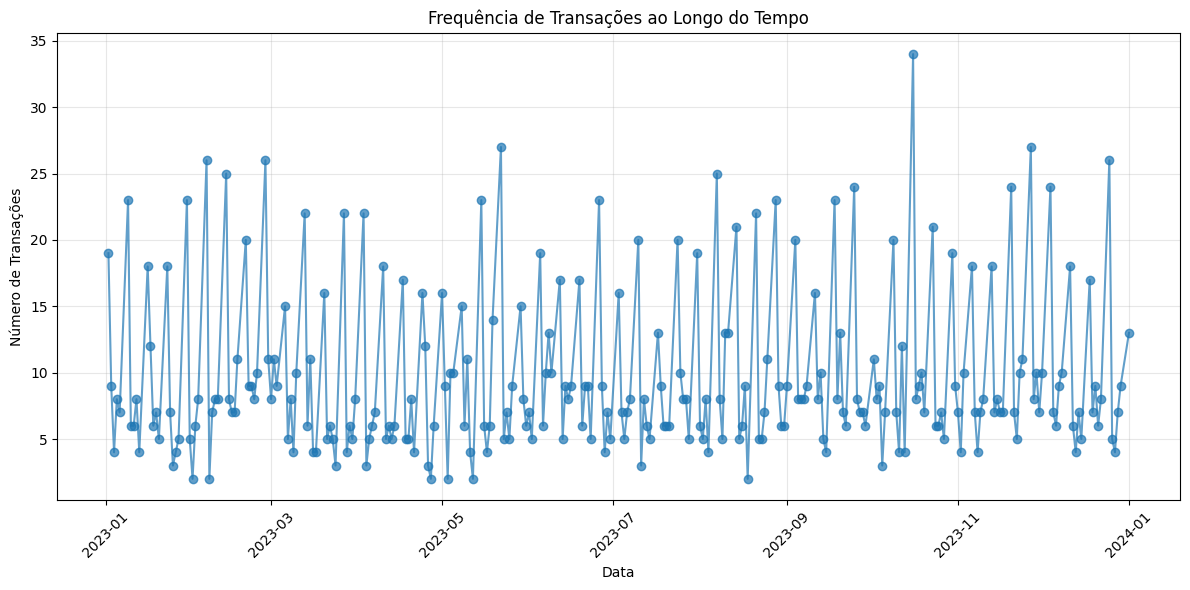

In [32]:
transactions_por_dia = df.groupby(df['TransactionDate'].dt.date).size()

plt.figure(figsize=(12, 6))
plt.plot(transactions_por_dia.index, transactions_por_dia.values, marker='o', alpha=0.7)
plt.title('Frequência de Transações ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Número de Transações')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### Transações por dia da semana:

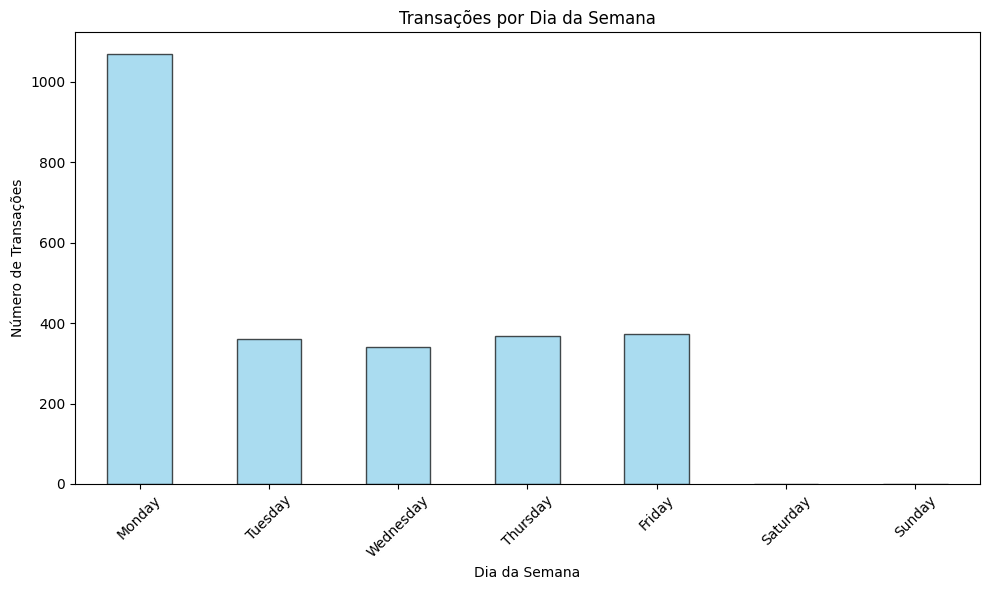

In [35]:
df['DayOfWeek'] = df['TransactionDate'].dt.day_name()

transactions_by_weekday = df['DayOfWeek'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

plt.figure(figsize=(10, 6))
transactions_by_weekday.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Transações por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Transações')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Distribuição Etária `(CustomerAge)`
Analisar a faixa etária para identificar padrões em clientes suspeitos ou frequentes.

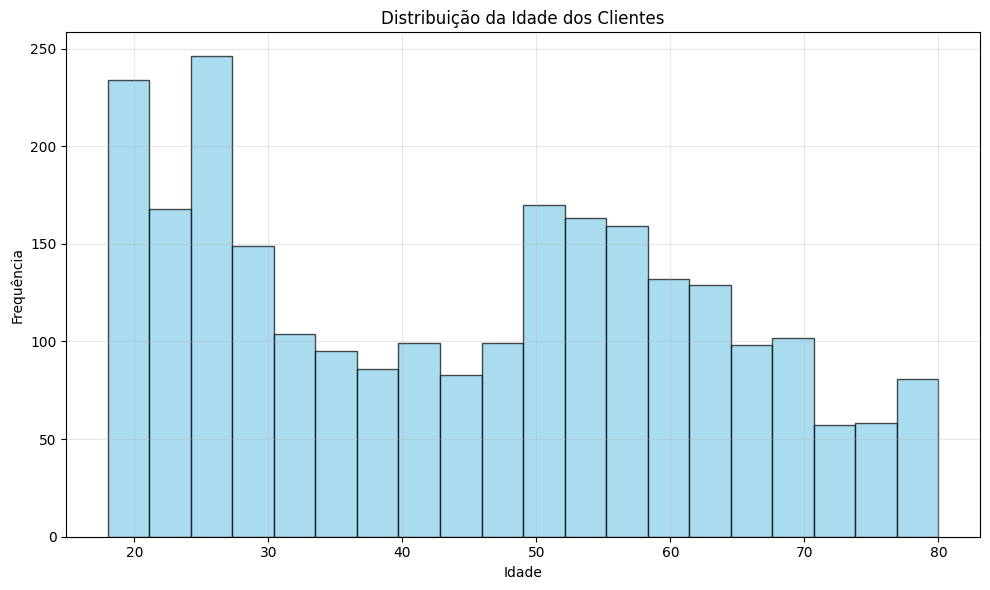

In [38]:
plt.figure(figsize=(10, 6))
plt.hist(df['CustomerAge'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribuição da Idade dos Clientes')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### Duração das Transações `(TransactionDuration)`
Explorar tempos anômalos (curtos ou longos) que podem indicar fraude.

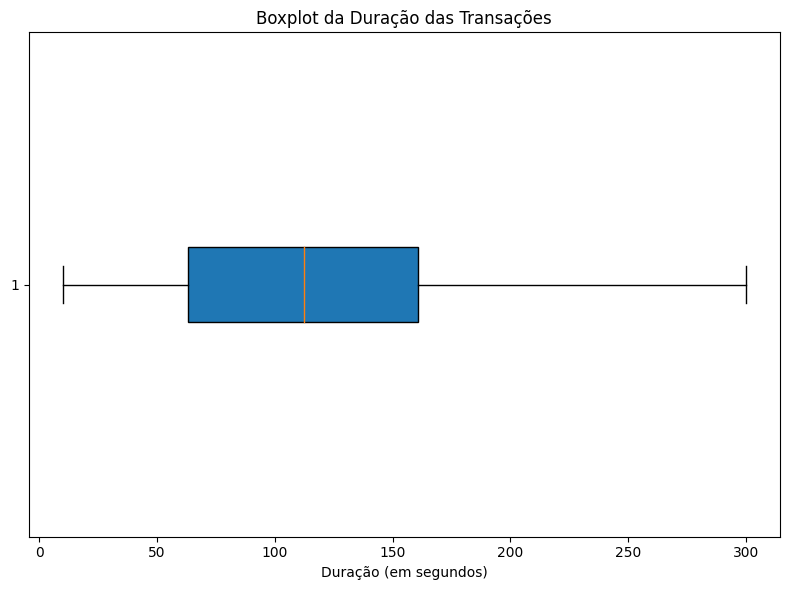

In [41]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['TransactionDuration'], vert=False, patch_artist=True)
plt.title('Boxplot da Duração das Transações')
plt.xlabel('Duração (em segundos)')
plt.tight_layout()
plt.show()


### Tentativas de Login `(LoginAttempts)`
Identificar tentativas múltiplas, que podem ser suspeitas.

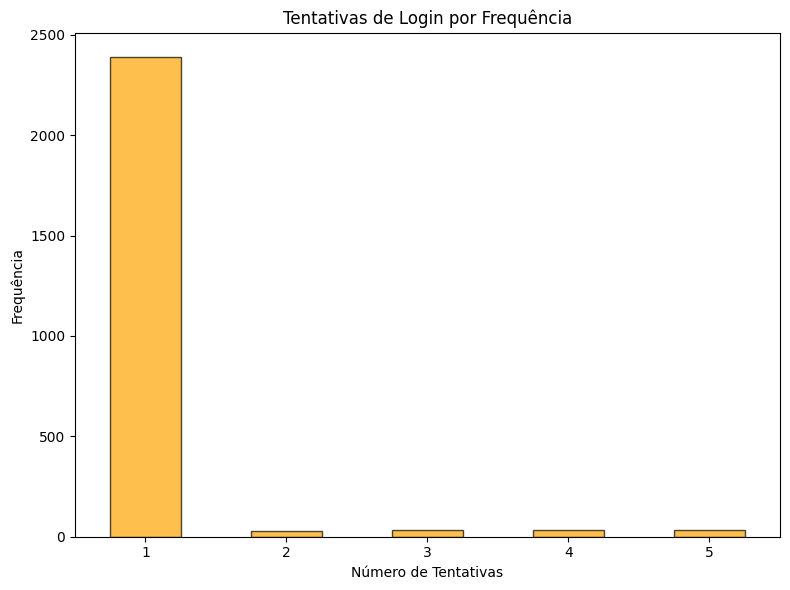

In [44]:
login_attempts = df['LoginAttempts'].value_counts().sort_index() 
plt.figure(figsize=(8, 6))
login_attempts.plot(kind='bar', color='orange', edgecolor='black', alpha=0.7)
plt.title('Tentativas de Login por Frequência')
plt.xlabel('Número de Tentativas')
plt.ylabel('Frequência')
plt.xticks(ticks=range(len(login_attempts.index)), labels=login_attempts.index, rotation=0)  
plt.tight_layout()
plt.show()


### Relação Entre Variáveis Númericas
Verificando correlações, como entre saldo, idade e valores transacionados.



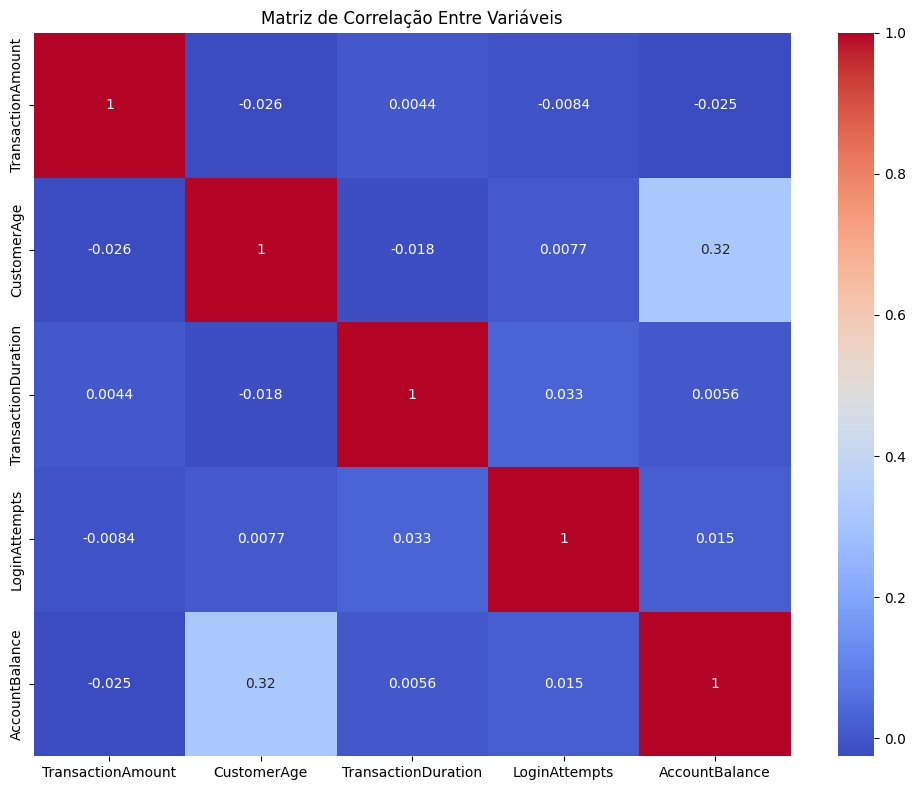

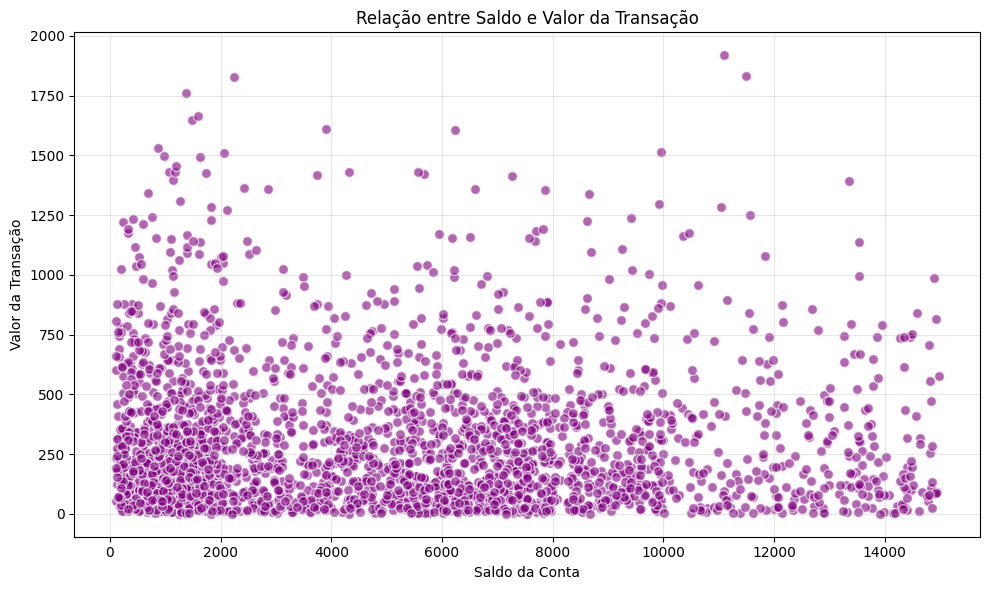

In [47]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['TransactionAmount', 'CustomerAge', 'TransactionDuration', 
                'LoginAttempts', 'AccountBalance']].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação Entre Variáveis')
plt.tight_layout()
plt.show()

# TransactionAmount vs AccountBalance
plt.figure(figsize=(10, 6))
plt.scatter(df['AccountBalance'], df['TransactionAmount'], alpha=0.6, edgecolor='w', s=50, color='purple')
plt.title('Relação entre Saldo e Valor da Transação')
plt.xlabel('Saldo da Conta')
plt.ylabel('Valor da Transação')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# Insights 

## Distribuição das Transações
A análise dos gráficos revelou insights interessantes sobre os dados de transações e comportamentos associados. Na distribuição dos valores das transações, observamos que a maioria está concentrada em valores mais baixos, com poucos registros acima de 1000. Esses outliers, que aparecem em níveis significativamente altos, como acima de 1500, podem ser indicadores de transações atípicas ou fraudulentas, exigindo investigação mais aprofundada.

## Transações ao Longo do Tempo
Ao longo do tempo, as transações apresentaram variações significativas, com picos em alguns dias específicos. Isso sugere uma possível sazonalidade ou a ocorrência de eventos pontuais que intensificaram o volume de transações. Esses picos atípicos podem estar relacionados a promoções, datas especiais ou até mesmo atividades suspeitas que devem ser verificadas mais detalhadamente.

## Transações por Dia da Semana
A análise por dia da semana revelou que as segundas-feiras são o dia de maior atividade de transações, enquanto os outros dias apresentam um volume mais equilibrado. Esse padrão pode estar associado a um comportamento comum de clientes que realizam pagamentos ou compras após o final de semana, o que é típico em muitas situações financeiras e comerciais.

## Distribuição Etária
Quando analisamos a faixa etária, foi possível identificar uma concentração maior de clientes entre 20 e 30 anos, bem como entre 50 e 60 anos. Isso demonstra que essas faixas etárias são as mais ativas em termos de transações, enquanto os extremos, como clientes muito jovens (18 a 20 anos) e mais idosos (acima de 70 anos), têm participação menor. Esse comportamento pode refletir diferenças no acesso à tecnologia ou na natureza das transações realizadas por diferentes grupos etários.

## Duração das Transações
A duração das transações mostrou que a maioria dura entre 100 e 150 segundos, o que parece ser o padrão esperado. No entanto, transações muito curtas, próximas a 10 segundos, destacam-se como possíveis anomalias. Isso pode indicar transações automatizadas ou fraudulentas, que devem ser investigadas em mais detalhes.

## Tentativas de Login
As tentativas de login demonstraram que a grande maioria dos usuários consegue acessar na primeira tentativa. Contudo, as poucas ocorrências de múltiplas tentativas (quatro ou cinco vezes) podem ser indicativas de tentativas de invasão ou acessos não autorizados, o que é um comportamento suspeito e digno de atenção.

## Intervalos Entre Transações
Os intervalos entre as transações apresentaram uma distribuição ampla, mas com alguns casos de intervalos extremamente curtos. Esses padrões são indicativos de comportamentos automatizados, que podem ser um sinal de fraude, especialmente quando ocorrem em intervalos de segundos ou minutos.

## Relação Entre Variáveis Numéricas
A análise de correlação mostrou que, de modo geral, não há relações fortes entre as variáveis principais. A única correlação moderada observada foi entre a idade dos clientes e o saldo das contas, indicando que clientes mais velhos tendem a manter saldos mais altos. Essa correlação, embora fraca, reflete um comportamento financeiro esperado, mas não está diretamente relacionaias de detecção de fraudes.



In [49]:
df.select_dtypes(include=['object']).describe().transpose()


,count,unique,top,freq
AccountID,2512,495,AC00362,12
TransactionType,2512,2,Debit,1944
Location,2512,43,Fort Worth,70
DeviceID,2512,681,D000697,9
IP Address,2512,592,200.136.146.93,13
MerchantID,2512,100,M026,45
Channel,2512,3,Branch,868
CustomerOccupation,2512,4,Student,657
DayOfWeek,2512,5,Monday,1070


### Frequência de transações `(TransactionType)`
Identificar se há um desbalanceamento entre tipos de transação que pode afetar o modelo preditivo e explore se transações do tipo menos frequente (provavelmente Crédito) têm maior probabilidade de serem fraudulentas.

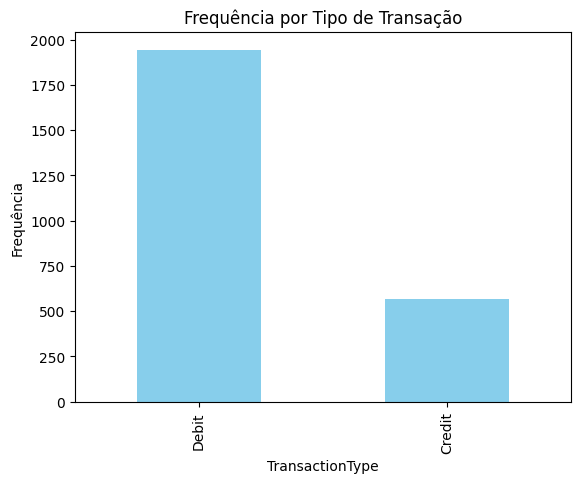

In [53]:
df['TransactionType'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Frequência por Tipo de Transação')
plt.xlabel('TransactionType')
plt.ylabel('Frequência')
plt.show()


### Localização `(Location)`
Identificar localizações com atividades mais frequentes que podem ser alvos de fraudes e localizações raras que podem ser associadas a transações atípicas.

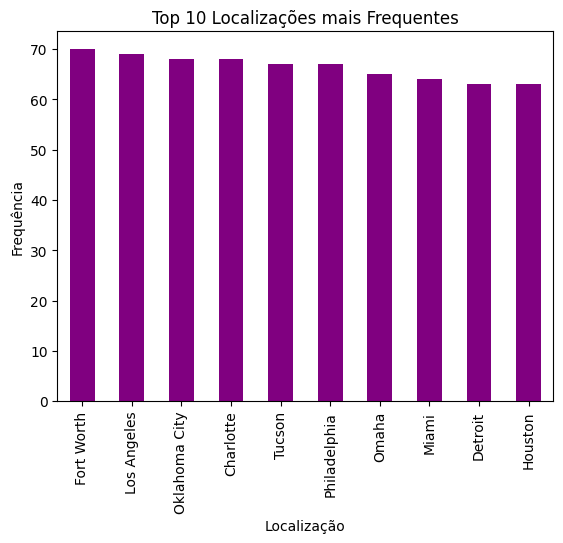

In [56]:
df['Location'].value_counts().head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Localizações mais Frequentes')
plt.xlabel('Localização')
plt.ylabel('Frequência')
plt.show()


## Dispositivos `(DeviceID)`
Identificar dispositivos mais usados por contas e possíveis padrões suspeitos, requências muito baixas (dispositivos raros) podem estar associadas a tentativas de fraude.

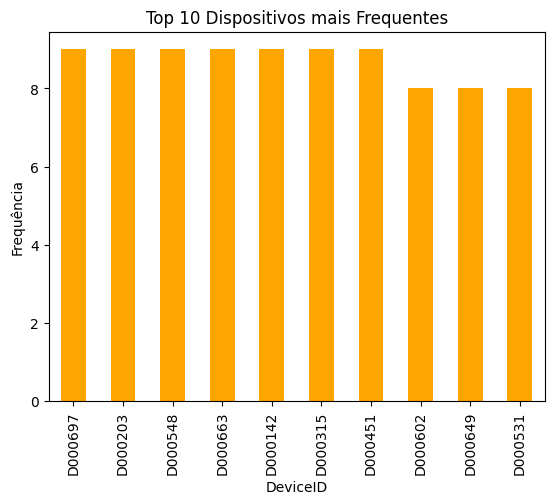

In [59]:
df['DeviceID'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Dispositivos mais Frequentes')
plt.xlabel('DeviceID')
plt.ylabel('Frequência')
plt.show()


### Endereço IP `(IP Address)`
Endereços IP com frequências muito altas ou baixas podem ser sinais de comportamento anômalo. O objetivo é Indentificar se múltiplos AccountID estão associados a um mesmo endereço IP.

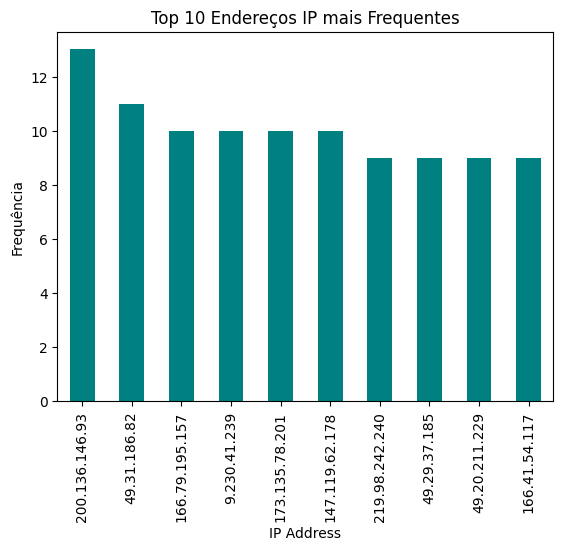

In [62]:
df['IP Address'].value_counts().head(10).plot(kind='bar', color='teal')
plt.title('Top 10 Endereços IP mais Frequentes')
plt.xlabel('IP Address')
plt.ylabel('Frequência')
plt.show()


 ### Comerciantes `(MerchantID)`
Comerciantes muito frequentes podem indicar comportamentos legítimos ou, em caso contrário, serem alvos de fraude.
Comerciantes raros podem estar relacionados a transações anômalas.

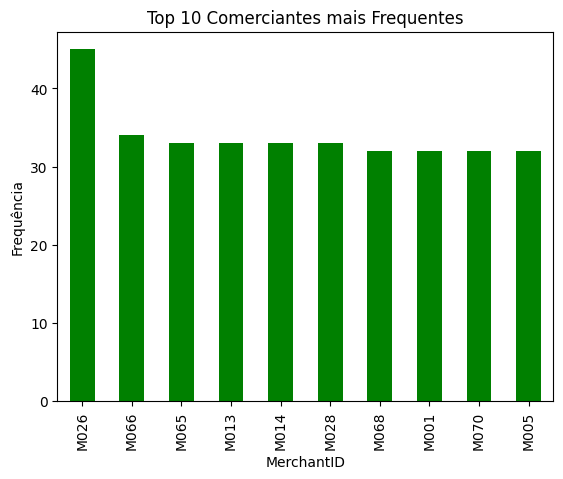

In [65]:
df['MerchantID'].value_counts().head(10).plot(kind='bar', color='green')
plt.title('Top 10 Comerciantes mais Frequentes')
plt.xlabel('MerchantID')
plt.ylabel('Frequência')
plt.show()


### Canais de Transação `(Channel)`
Canais menos usados podem ser mais propensos a fraudes (ex.: transações online).

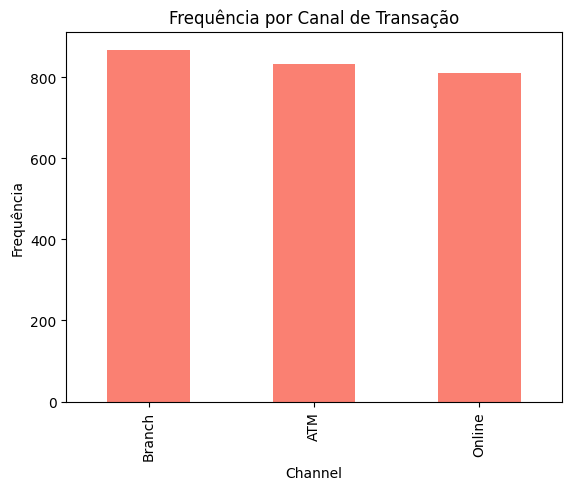

In [68]:
df['Channel'].value_counts().plot(kind='bar', color='salmon')
plt.title('Frequência por Canal de Transação')
plt.xlabel('Channel')
plt.ylabel('Frequência')
plt.show()


### Ocupação do Cliente `(CustomerOccupation)`
Explorar se certas ocupações estão desproporcionalmente associadas a transações fraudulentas.


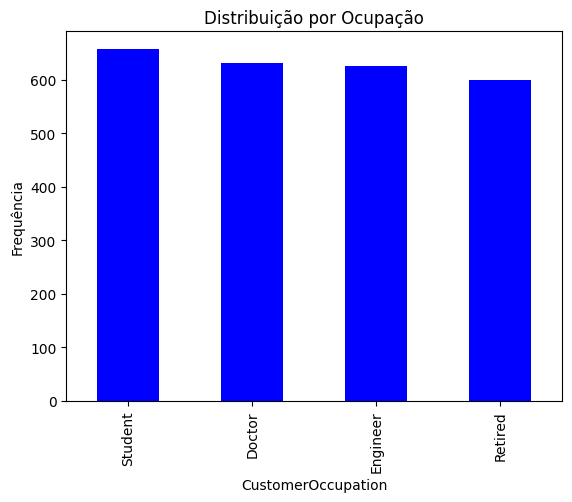

In [71]:
df['CustomerOccupation'].value_counts().plot(kind='bar', color='blue')
plt.title('Distribuição por Ocupação')
plt.xlabel('CustomerOccupation')
plt.ylabel('Frequência')
plt.show()


# Insights

### **Frequência por Tipo de Transação**
O gráfico mostra que as transações do tipo **Débito** são significativamente mais frequentes do que as de **Crédito**. Isso sugere que os clientes utilizam preferencialmente operações de débito. Esse desbalanceamento pode ter implicações nos modelos de análise e deve ser considerado na avaliação de possíveis fraudes, já que tipos de transação menos frequentes, como crédito, podem apresentar padrões de risco diferenciados.

### **Top 10 Localizações mais Frequentes**
Os locais como **Fort Worth**, **Los Angeles** e **Oklahoma City** lideram em número de transações, com frequências bastante próximas. Essa distribuição homogênea entre as localizações sugere que não há uma concentração anômala em um local específico. No entanto, seria interessante cruzar esses dados com outras variáveis, como tipo de transação e canal, para verificar se há comportamentos suspeitos em locais específicos.

### **Top 10 Dispositivos mais Frequentes**
A frequência de dispositivos usados para realizar transações é bastante homogênea, com todos os 10 dispositivos principais apresentando um uso similar. Isso pode ser indicativo de um comportamento legítimo. Contudo, dispositivos que aparecem com frequência muito alta podem sugerir pontos de risco, como acessos compartilhados ou dispositivos comprometidos.

### **Top 10 Endereços IP mais Frequentes**
O endereço IP **200.136.146.93** aparece com a maior frequência, destacando-se dos demais. Isso pode indicar um ponto de atenção, pois um único IP altamente frequente pode ser sinal de uso compartilhado ou até mesmo de comportamento automatizado. Investigar transações associadas a esse IP pode ajudar a identificar possíveis anomalias.

### **Top 10 Comerciantes mais Frequentes**
O comerciante **M026** aparece com uma frequência significativamente maior do que os outros. Isso levanta a hipótese de que este comerciante pode estar associado a transações concentradas ou repetitivas. Avaliar se essas transações estão alinhadas com o comportamento esperado para esse comerciante é importante para identificar possíveis fraudes ou irregularidades.

### **Frequência por Canal de Transação**
Os canais **Branch**, **ATM** e **Online** possuem frequências muito próximas, com **Branch** ligeiramente na frente. Essa distribuição uniforme sugere que os clientes utilizam os diferentes canais de forma equilibrada. Contudo, transações realizadas no canal **Online** podem merecer atenção especial, devido ao maior risco potencial de fraudes nesse ambiente.

### **Distribuição por Ocupação**
As ocupações mais frequentes são **Students**, **Doctors**, **Engineers** e **Retired**, com distribuições também bastante uniformes. Não há um grupo que se destaque claramente, o que sugere que não há um padrão de ocupação associado a um volume anômalo de transações. 



## Normalização e Padronização dos Dados

In [75]:
# Esse código tem como objetivo identificar as colunas que provavelmente precisam de normalização ou padronização
numerical_columns = df.select_dtypes(include=[np.number]).columns
columns_for_normalization = []

for column in numerical_columns:
    min_val = df[column].min()
    max_val = df[column].max()
    mean_val = df[column].mean()
    std_dev = df[column].std()
    
    # Se a diferença entre o máximo e o mínimo for muito grande ou se o desvio padrão for grande
    # podemos considerar que a variável precisa de normalização ou padronização.
    # No entanto, iremos tratar apenas no pré-processamento, meu objetivo é apenas ter uma ideia qual variavel precisa desses tipos de tratamento.
    if max_val - min_val > 5 * std_dev or std_dev > mean_val:
        columns_for_normalization.append(column)

print("\nColunas que provavelmente precisam de normalização ou padronização:")
print(columns_for_normalization)



Colunas que provavelmente precisam de normalização ou padronização:
['TransactionAmount', 'LoginAttempts']


## Outliers

In [78]:
numerical_columns = df.select_dtypes(include=[np.number]).columns
outliers = {}

for column in numerical_columns:
    # Calculando o Q1 (25%) e Q3 (75%)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Definindo os limites inferior e superior para outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identificando os outliers
    outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]

# Exibindo as variáveis com o número de outliers
print("Outliers detectados por IQR:")
for column, count in outliers.items():
    print(f"{column}: {count} outliers")


Outliers detectados por IQR:
TransactionAmount: 113 outliers
CustomerAge: 0 outliers
TransactionDuration: 0 outliers
LoginAttempts: 122 outliers
AccountBalance: 0 outliers


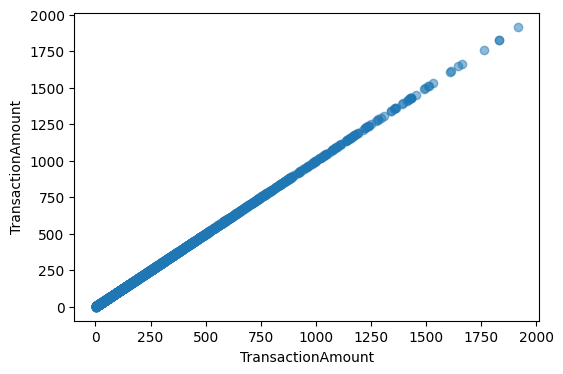

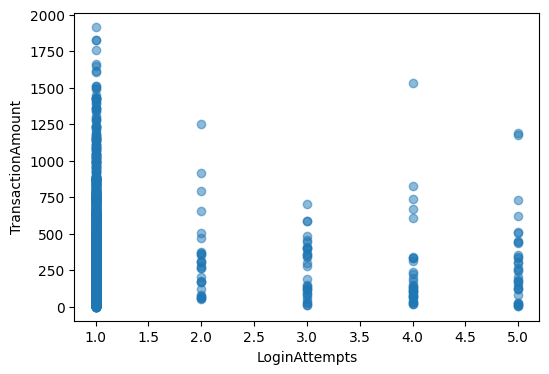

In [80]:
# Variáveis com outliers
variables_with_outliers = ['TransactionAmount', 'LoginAttempts']
for column in variables_with_outliers:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[column], df['TransactionAmount'], alpha=0.5)  
    plt.xlabel(column)
    plt.ylabel('TransactionAmount')
    plt.show()

## Outliers (Variáveis Ctaegóricas)

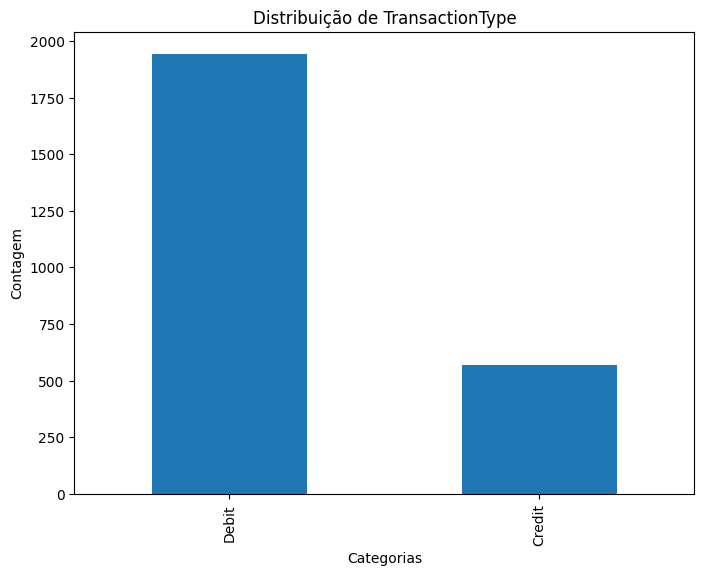

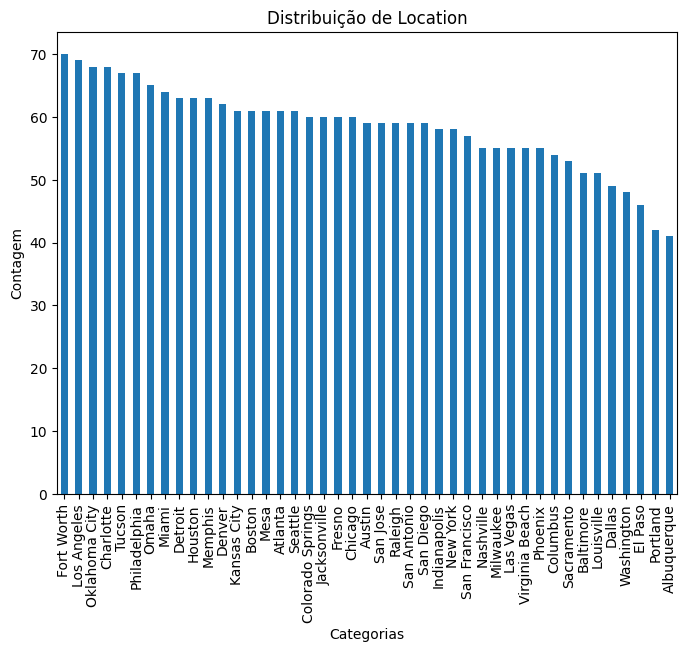

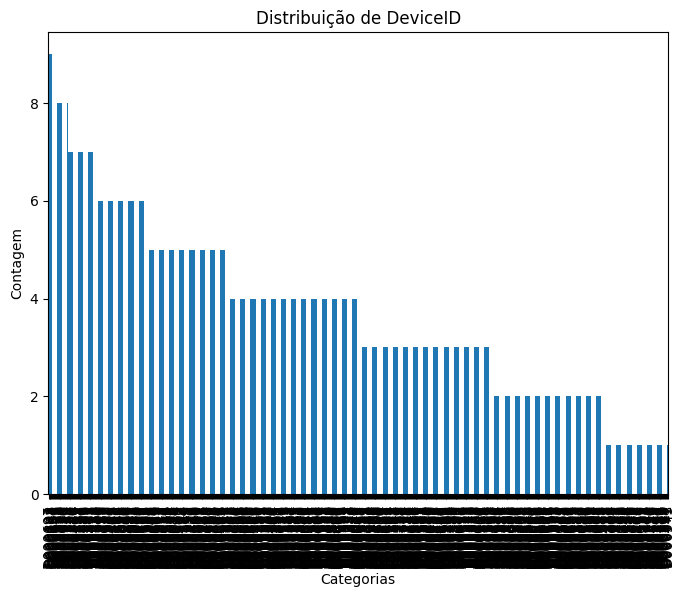

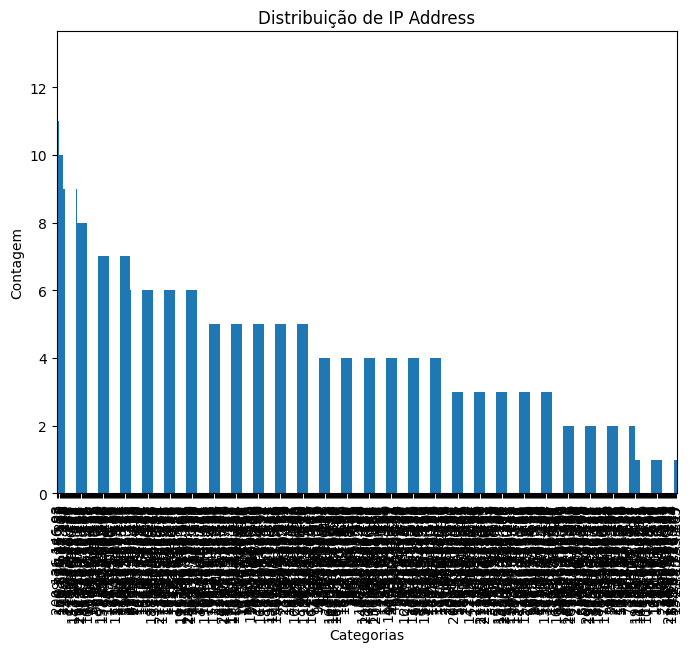

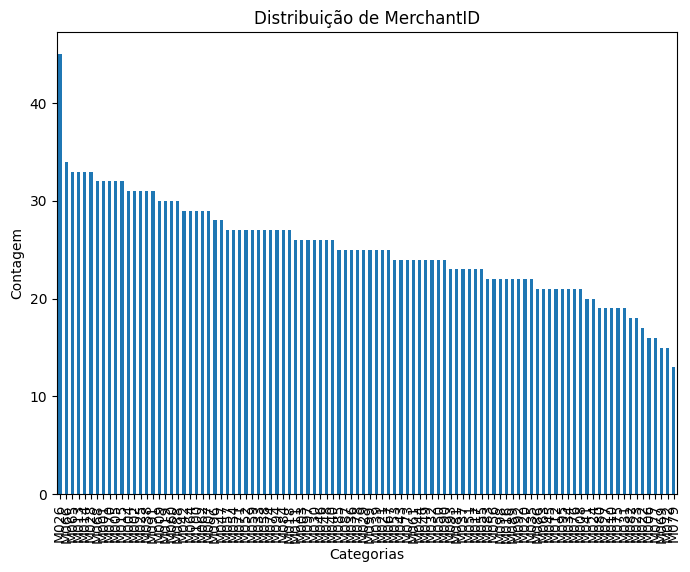

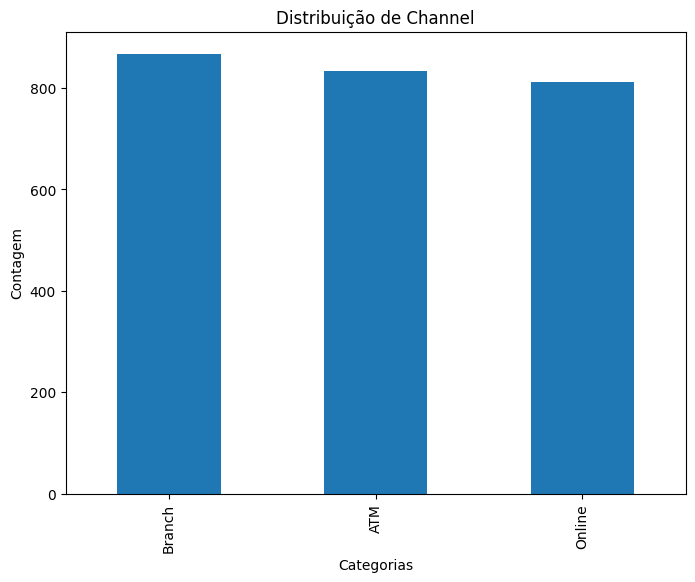

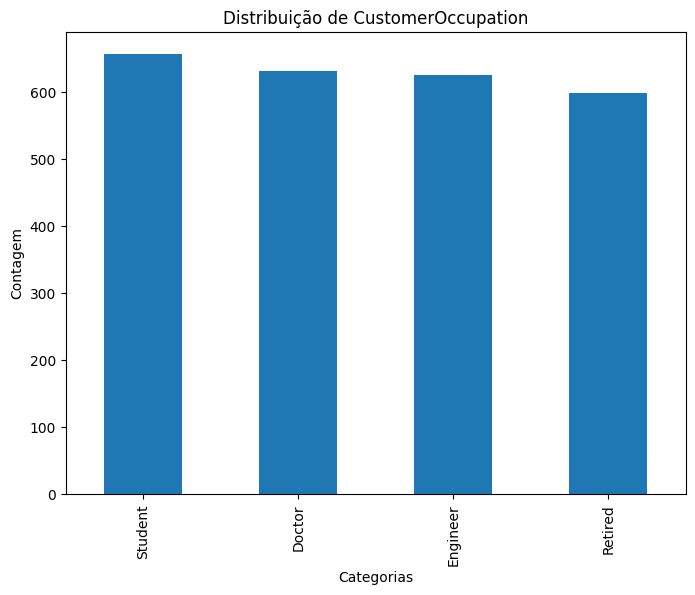

{'TransactionType': {'high_freq': Series([], Name: count, dtype: int64), 'low_freq': Series([], Name: count, dtype: int64)}, 'Location': {'high_freq': Series([], Name: count, dtype: int64), 'low_freq': Location
Fort Worth          70
Los Angeles         69
Oklahoma City       68
Charlotte           68
Tucson              67
Philadelphia        67
Omaha               65
Miami               64
Detroit             63
Houston             63
Memphis             63
Denver              62
Kansas City         61
Boston              61
Mesa                61
Atlanta             61
Seattle             61
Colorado Springs    60
Jacksonville        60
Fresno              60
Chicago             60
Austin              59
San Jose            59
Raleigh             59
San Antonio         59
San Diego           59
Indianapolis        58
New York            58
San Francisco       57
Nashville           55
Milwaukee           55
Las Vegas           55
Virginia Beach      55
Phoenix             55
Columbu

In [83]:
# Função para detectar outliers em variáveis categóricas com base nas frequências
def detect_outliers_categorical(df, categorical_columns):
    outliers = {}
    
    for column in categorical_columns:
        freq = df[column].value_counts()
        
        # Identificando as categorias com frequências muito altas ou muito baixas
        threshold_high = 0.8 * len(df)  # Categorias que representam mais de 80% dos dados
        threshold_low = 0.05 * len(df)  # Categorias que representam menos de 5% dos dados
        
        # Categorias com alta frequência
        high_freq_categories = freq[freq > threshold_high]
        low_freq_categories = freq[freq < threshold_low]
        
        # Salvando as categorias que são outliers
        outliers[column] = {
            'high_freq': high_freq_categories,
            'low_freq': low_freq_categories
        }
        
        # Visualizando a distribuição das frequências das categorias
        plt.figure(figsize=(8, 6))
        freq.plot(kind='bar', title=f'Distribuição de {column}')
        plt.xlabel('Categorias')
        plt.ylabel('Contagem')
        plt.show()

    return outliers

# Chame a função passando as variáveis categóricas que você deseja verificar
categorical_columns = ['TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation']
outliers = detect_outliers_categorical(df, categorical_columns)

# Exibindo os outliers identificados
print(outliers)


### **Outliers em Variáveis Numéricas**:
- **TransactionAmount**, **LoginAttempts**: Outliers nessas variáveis podem indicar transações atípicas que são frequentemente associadas a fraudes. Transações com valores muito altos ou baixos, tentativas de login em excesso ou transações com durações incomuns são frequentemente características de atividades fraudulentas, como **fraudes de identidade**, **transações automatizadas** ou **ataques de força bruta**.
  
Esses outliers são cruciais para **filtrar transações suspeitas** e investigar padrões que não se alinham com o comportamento normal dos clientes.

### **Outliers em Variáveis Categóricas**:
- **Location**, **DeviceID**, **IP Address**, **MerchantID**: Outliers nas variáveis categóricas podem identificar **comportamentos geograficamente incomuns** ou **identidades falsificadas**. Por exemplo, transações realizadas de locais ou dispositivos inesperados, ou com comerciantes pouco frequentes, podem ser indicativos de **fraude de identidade** ou **tentativas de acesso não autorizado**.
  
Esses outliers são indicadores de que o comportamento do cliente mudou repentinamente, o que pode justificar uma investigação mais detalhada. Mudanças de localização, por exemplo, podem sugerir **fraudes geográficas**, enquanto novos dispositivos ou IPs indicam possíveis **fraudes de conta**.

### **Conclusão**:
Outliers, tanto em variáveis numéricas quanto categóricas, devem ser vistos como **sinais de alerta**. Embora nem todo outlier seja uma fraude, eles fornecem **indicativos importantes de comportamentos atípicos**, que merecem uma investigação mais profunda. O monitoramento dessas anomalias é essencial para melhorar a eficácia na **detecção de fraudes** e proteger o sistema contra atividades fraudulentas.

# Engenharia de Features

### Número de Transações por DeviceID
 A contagem de transações por dispositivo ajuda a identificar se um dispositivo está sendo utilizado de forma excessiva, o que pode ser um indício de fraude (como dispositivos compartilhados ou usados para transações em massa).

In [87]:
# Contagem de transações por DeviceID
df['DeviceID_transaction_count'] = df.groupby('DeviceID')['DeviceID'].transform('count')

# A contagem de transações por dispositivo pode indicar comportamento atípico, como o uso excessivo de um dispositivo para transações.
print(df[['DeviceID', 'DeviceID_transaction_count']].head())


  DeviceID  DeviceID_transaction_count
0  D000380                           6
1  D000051                           5
2  D000235                           5
3  D000187                           6
4  D000308                           3


### Número de Contas Associadas a um Dispositivo (DeviceID)
Se um único dispositivo está associado a várias contas, isso pode ser um sinal de fraude, já que fraudadores podem usar um único dispositivo para realizar transações em várias contas.

In [89]:
# Contagem de contas associadas a cada DeviceID
df['DeviceID_account_count'] = df.groupby('DeviceID')['AccountID'].transform('nunique')

# Se um dispositivo for compartilhado por várias contas, isso pode ser um padrão de fraude.
print(df[['DeviceID', 'DeviceID_account_count']].head())


  DeviceID  DeviceID_account_count
0  D000380                       6
1  D000051                       5
2  D000235                       5
3  D000187                       6
4  D000308                       3


### Número de Dispositivos por MerchantID
 Comerciantes que são acessados por muitos dispositivos diferentes podem estar envolvidos em atividades suspeitas. Isso pode indicar que um comerciante está sendo utilizado de forma fraudulenta por várias contas e dispositivos.

In [91]:
# Contagem de dispositivos associados a cada MerchantID
df['MerchantID_device_count'] = df.groupby('MerchantID')['DeviceID'].transform('nunique')

# Comerciantes com muitos dispositivos podem indicar atividades fraudulentas, já que um comerciante legítimo normalmente não teria tantas fontes diferentes de transação.
print(df[['MerchantID', 'MerchantID_device_count']].head())


  MerchantID  MerchantID_device_count
0       M015                       31
1       M052                       26
2       M009                       30
3       M002                       31
4       M091                       30


### Contagem de Localidades Associadas a um DeviceIDSe um dispositivo está sendo utilizado em múltiplas localidades geográficas, isso pode indicar comportamento fraudulento. Transações de um dispositivo em locais diferentes em um curto período de tempo são incomuns e podem ser um indicativo de fraude.d())


In [93]:
# Contagem de locais únicos associados a cada DeviceID
df['DeviceID_location_count'] = df.groupby('DeviceID')['Location'].transform('nunique')

# Dispositivos usados em várias localizações podem ser suspeitos, especialmente se as localizações são muito distantes.
print(df[['DeviceID', 'DeviceID_location_count']].head())


  DeviceID  DeviceID_location_count
0  D000380                        6
1  D000051                        4
2  D000235                        5
3  D000187                        6
4  D000308                        3


### LoginAttempts x TransactionAmount
Muitas tentativas de login combinadas com grandes transações podem ser indicativos de fraude.

In [95]:
# Exemplo de interação entre variáveis
df['TransactionAmount_by_LoginAttempts'] = df['TransactionAmount'] * df['LoginAttempts']
print(df[['TransactionAmount', 'LoginAttempts']].head())


   TransactionAmount  LoginAttempts
0              14.09              1
1             376.24              1
2             126.29              1
3             184.50              1
4              13.45              1


### TransactioDate x PreviousTransactionDate
Dados temporais transformados frequentemente têm mais relevância para detecção de padrões.

In [137]:
# Criando a variável TimeSincePreviousTransaction (em dias)
df['TimeSincePreviousTransaction'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.total_seconds() / (24 * 60 * 60)

# Visualizar o resultado
df['TimeSincePreviousTransaction']

0      -572.652014
1      -495.642546
2      -482.577037
3      -548.650637
4      -384.593924
           ...    
2507   -557.626308
2508   -592.607569
2509   -440.624873
2510   -618.658056
2511   -628.657245
Name: TimeSincePreviousTransaction, Length: 2512, dtype: float64

In [141]:
df['TimeSincePreviousTransaction'] = df['TimeSincePreviousTransaction'].abs()
df['TimeSincePreviousTransaction']

0       572.652014
1       495.642546
2       482.577037
3       548.650637
4       384.593924
           ...    
2507    557.626308
2508    592.607569
2509    440.624873
2510    618.658056
2511    628.657245
Name: TimeSincePreviousTransaction, Length: 2512, dtype: float64

In [147]:
# Verificar se alguma data anterior é maior que a data atual
inverted_dates = df[df['TransactionDate'] < df['PreviousTransactionDate']]

print(f"Número de datas inconsistentes: {len(inverted_dates)}")
if not inverted_dates.empty:
    print("Amostra de dados inconsistentes:")
    print(inverted_dates.head())


Número de datas inconsistentes: 0


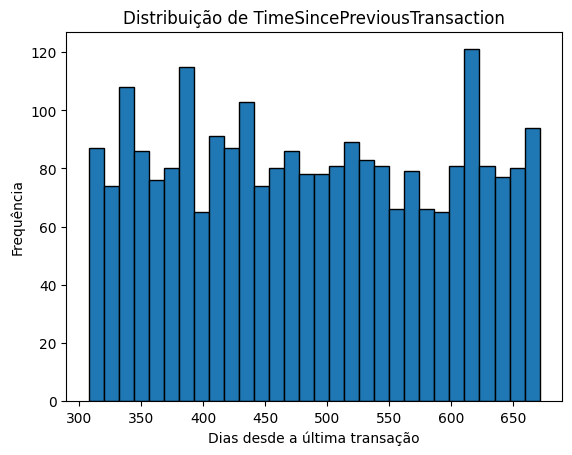

In [149]:
plt.hist(df['TimeSincePreviousTransaction'], bins=30, edgecolor='k')
plt.title('Distribuição de TimeSincePreviousTransaction')
plt.xlabel('Dias desde a última transação')
plt.ylabel('Frequência')
plt.show()


In [154]:
# Exibindo as primeiras linhas das novas variáveis
print(df[['DeviceID', 'DeviceID_transaction_count', 'DeviceID_account_count', 'MerchantID_device_count', 'DeviceID_location_count', 'TransactionAmount_by_LoginAttempts', 'TimeSincePreviousTransaction']].head())

  DeviceID  DeviceID_transaction_count  DeviceID_account_count  \
0  D000380                           6                       6   
1  D000051                           5                       5   
2  D000235                           5                       5   
3  D000187                           6                       6   
4  D000308                           3                       3   

   MerchantID_device_count  DeviceID_location_count  \
0                       31                        6   
1                       26                        4   
2                       30                        5   
3                       31                        6   
4                       30                        3   

   TransactionAmount_by_LoginAttempts  TimeSincePreviousTransaction  
0                               14.09                    572.652014  
1                              376.24                    495.642546  
2                              126.29                    482.5

### Conclusão sobre a Engenharia de Features

A engenharia de features que realizei tem como objetivo identificar padrões e comportamentos atípicos nas transações bancárias, com foco em aspectos que podem ser indicativos de fraudes. Cada nova variável foi criada com base em uma análise cuidadosa do comportamento das transações e características dos dados. Abaixo, listo os principais pontos abordados e a importância de cada uma das novas variáveis:

---

### **Número de Transações por DeviceID**:

**Objetivo**: Identificar dispositivos que estão sendo utilizados de forma excessiva ou em um número incomum de transações.  
Um dispositivo com um número muito alto de transações pode indicar que ele está sendo compartilhado ou usado de forma fraudulenta. Esse comportamento é típico em fraudes, como quando um dispositivo é utilizado para realizar transações em várias contas.

---

### **Número de Contas Associadas a um Dispositivo (DeviceID)**:

**Objetivo**: Detectar se um único dispositivo está sendo compartilhado entre várias contas, o que pode ser um sinal claro de fraude.  
Quando um dispositivo é associado a muitas contas, pode indicar que ele está sendo usado por fraudadores para realizar transações em várias contas, ou seja, é um comportamento atípico que pode ser indicativo de fraude.

---

### **Número de Dispositivos por MerchantID**:

**Objetivo**: Identificar comerciantes que estão sendo acessados por um número excessivo de dispositivos.  
Comerciantes com uma quantidade anormalmente alta de dispositivos associados podem ser suspeitos de estarem envolvidos em atividades fraudulentas, especialmente quando transações de diferentes dispositivos são realizadas no mesmo comerciante de forma contínua ou em massa.

---

### **Contagem de Localidades Associadas a um DeviceID**:

**Objetivo**: Verificar se um dispositivo está sendo utilizado em diferentes localidades geográficas.  
Dispositivos que estão sendo usados em várias localizações distantes em um curto período de tempo podem ser um indicativo claro de fraude. Esse comportamento é atípico, pois geralmente um único dispositivo está associado a uma localização fixa, especialmente se as transações são realizadas rapidamente em locais distantes.

---

### **Interação entre LoginAttempts e TransactionAmount**:

**Objetivo**: Verificar se há uma correlação entre o número de tentativas de login e o valor das transações.  
Uma grande quantidade de tentativas de login seguida de uma grande transação pode ser um forte indicativo de fraude. Fraudadores frequentemente tentam acessar uma conta repetidamente antes de realizar transações significativas, o que torna essa interação importante para identificar comportamentos suspeitos.

---

### **Intervalo de Tempo Desde a Última Transação (TimeSincePreviousTransaction)**:

**Objetivo**: Capturar padrões temporais entre as transações e identificar intervalos de tempo anômalos.  
Essa variável mede o intervalo de tempo (em dias) desde a última transação. Sua relevância está em identificar comportamentos suspeitos, como:
- **Intervalos muito curtos**: Podem indicar comportamento automatizado ou ataques de bots.
- **Intervalos muito longos**: Podem representar contas inativas que foram comprometidas e reativadas para fraudes.  
O gráfico da distribuição dessa variável indica uma dispersão relativamente uniforme, com frequências mais altas em torno de 400 e 600 dias. Esses padrões podem estar associados a comportamentos legítimos, mas intervalos fora do esperado ou inconsistentes com o histórico do cliente podem ser um forte indicativo de fraude.

---

### Impacto e Relevância das Features

Essas variáveis geradas são altamente relevantes para a detecção de fraudes, pois fornecem uma visão detalhada sobre o comportamento dos dispositivos, comerciantes e contas envolvidas nas transações. Através delas, podemos identificar padrões atípicos e suspeitos, como o uso de dispositivos compartilhados, transações em locais diferentes em pouco tempo, intervalos de tempo anômalos, e comportamentos incoerentes de comerciantes.

A utilização dessas features no modelo de machine learning provavelmente aumentará a capacidade do modelo em identificar fraudes, uma vez que ele poderá detectar essas anomalias mais rapidamente e com mais precisão.

Em resumo, as novas features agregam valor significativo à análise, permitindo detectar comportamentos e transações que, em um cenário de fraude, seriam difíceis de identificar apenas com as variáveis originais. A próxima etapa será testar essas features no modelo e avaliar o impacto delas na precisão da detecção de fraudes.

## Salvando o DataFrame Atualizado em um arquivo CSV

In [156]:
df.to_csv('detecção_de_fraude.csv', index=False)
